In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

In [5]:
better = pd.read_csv("results/arima10EvaluationBetter.csv")
worse = pd.read_csv("results/arima10EvaluationWorse.csv")
statistics = pd.read_csv("results/arima10Statistics.csv")

SHAPIRO_VALUE = "ShapiroValue"
LJUNG_VALUE = "ljungValue"
STORE_ID = "storeId"
DEPARTMENT_ID = "departmentId"

In [30]:
len(better)

744

In [7]:
significant = statistics[(statistics[SHAPIRO_VALUE] > 0.05) & (statistics[LJUNG_VALUE] > 0.05)]

In [8]:
len(significant)

437

In [9]:
len(statistics)

2573

<Figure size 7000x5000 with 0 Axes>

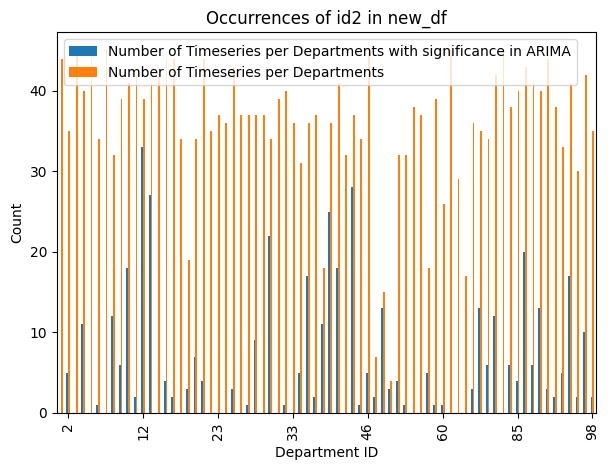

In [51]:
id2_counts = significant[DEPARTMENT_ID].value_counts().sort_index()
new_counts = statistics[DEPARTMENT_ID].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Number of Timeseries per Departments with significance in ARIMA': id2_counts,
    'Number of Timeseries per Departments': new_counts
}).fillna(0)
# Plot the counts
plt.figure(figsize=(70,50))
comparison_df.plot(kind='bar')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.title('Occurrences of id2 in new_df')
plt.xticks(rotation=90)
plt.xticks(np.arange(1, 80, 10))
plt.tight_layout()
plt.show()

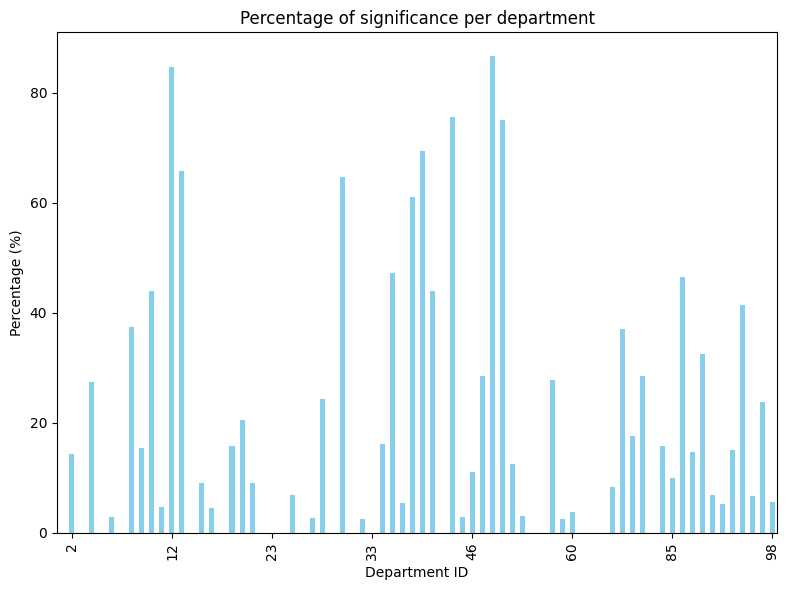

In [50]:
comparison_df['Percentage in Old DF'] = (comparison_df['Number of Departments with significance in ARIMA'] / comparison_df['Number of Departments']) * 100
comparison_df['Percentage in Old DF'] = comparison_df['Percentage in Old DF'].fillna(0)  # Handle division by zero

# Plot the percentage
plt.figure(figsize=(8, 6))
comparison_df['Percentage in Old DF'].plot(kind='bar', color='skyblue')
plt.xlabel('Department ID')
plt.ylabel('Percentage (%)')
plt.title('Percentage of significance per department')
plt.xticks(rotation=90)
plt.xticks(np.arange(1, 80, 10))
plt.tight_layout()
plt.show()

In [23]:
interestingDepartments = comparison_df[(comparison_df["Percentage in Old DF"] > 60)].reset_index()

In [24]:
len(interestingDepartments)

8

In [25]:
print(interestingDepartments)

   departmentId  Old DF  New DF  Percentage in Old DF
0            12    33.0      39             84.615385
1            13    27.0      41             65.853659
2            30    22.0      34             64.705882
3            37    11.0      18             61.111111
4            38    25.0      36             69.444444
5            42    28.0      37             75.675676
6            49    13.0      15             86.666667
7            50     3.0       4             75.000000


In [26]:
countsBetter = better[DEPARTMENT_ID].isin(interestingDepartments[DEPARTMENT_ID])

In [27]:
countsBetter.sum()

np.int64(75)

In [28]:
coutsWorse = worse[DEPARTMENT_ID].isin(interestingDepartments)

In [29]:
coutsWorse.sum()

np.int64(0)